In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from mcmfs.cable_simulation import Simulation

### Create Simulation Object

Creates the main simulation object with default parameter:
- fs: Sampling frequency [Samples/Sec] (default=3600)
- f0: Base frequency [Hz] (default=50)
- z: Numper of periods to simulate [-] (default=5)
- res: Resolution of the mesh-grid [m] (default=2e-4) 
    - This parameter does not effect the accuracy of the simulation in terms of the magnetic field measured by the virtual sensors
- d: Outer diameter of the whole conductor [m] (default=11e-3)

In [2]:
s = Simulation()

### Define Cable by Position and Size of Conductors

In [3]:
s.add_L1(diam=1.74e-3, pos_x=-0.422e-3, pos_y=3.016e-3)
s.add_L2(diam=1.74e-3, pos_x=2.328e-3, pos_y=-1.568e-3)
s.add_L3(diam=1.74e-3, pos_x=-2.514e-3, pos_y=0.552e-3)
s.add_N(diam=1.74e-3, pos_x=2.529e-3, pos_y=1.698e-3)
s.add_PE(diam=1.74e-3, pos_x=-0.938e-3, pos_y=-2.113e-3)

### Set Current and Voltages

We can set the RMS current and voltage amplitude (including phase) for the fundamental up to the 7-th harmonic

In [4]:
s.set_L1_I(A1=1, A3=0, A5=0, A7=0, Shift=0, Phi1=0, Phi3=0, Phi5=0, Phi7=0)
s.set_L1_V(A1=230, A3=0, A5=0, A7=0, Shift=0, Phi1=0, Phi3=0, Phi5=0, Phi7=0)

s.set_L2_I(A1=1, A3=0, A5=0, A7=0, Shift=-120, Phi1=0, Phi3=0, Phi5=0, Phi7=0)
s.set_L2_V(A1=230, A3=0, A5=0, A7=0, Shift=-120, Phi1=0, Phi3=0, Phi5=0, Phi7=0)

s.set_L3_I(A1=1, A3=0, A5=0, A7=0, Shift=120, Phi1=0, Phi3=0, Phi5=0, Phi7=0)
s.set_L3_V(A1=230, A3=0, A5=0, A7=0, Shift=120, Phi1=0, Phi3=0, Phi5=0, Phi7=0)

### Add Sensors

Add 5 equally spaced virtual magnetic field sensors around the cable.

In [5]:
s.add_sensors(n=8, phi0=0)

### Show Layout

To verify the correct positioning, we can plot the physical layout and the waveformes for the defined periodes

(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26a2dcb7bc8>)

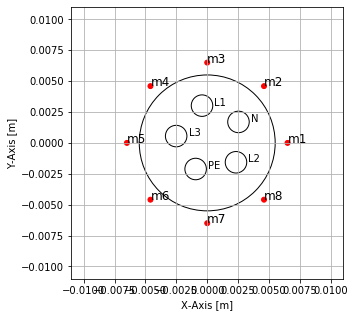

In [6]:
s.plot_Layout()

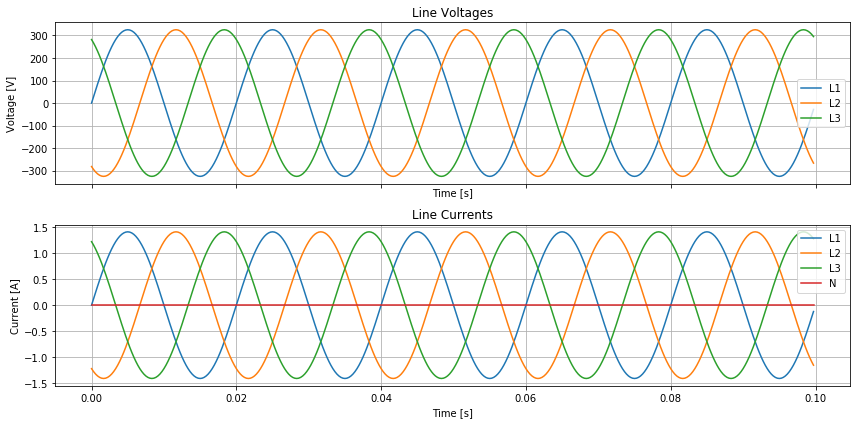

In [7]:
s.plot_Waveforms()

In [8]:
w = s.get_Waveforms()
w

,Time,L1V,L2V,L3V,L1I,L2I,L3I,NI
0,0.000000,0.000000,-281.691320,281.691320,0.000000,-1.224745,1.224745,-0.000000e+00
1,0.000278,28.349072,-294.793936,266.444864,0.123257,-1.281713,1.158456,-2.220446e-16
2,0.000556,56.482390,-305.652991,249.170601,0.245576,-1.328926,1.083350,-2.220446e-16
3,0.000833,84.185843,-314.185843,230.000000,0.366025,-1.366025,1.000000,-0.000000e+00
4,0.001111,111.248591,-320.327551,209.078960,0.483690,-1.392728,0.909039,-0.000000e+00
...,...,...,...,...,...,...,...,...
355,0.098611,-137.464670,-186.566702,324.031372,-0.597672,-0.811160,1.408832,-1.110223e-15
356,0.098889,-111.248591,-209.078960,320.327551,-0.483690,-0.909039,1.392728,-1.776357e-15
357,0.099167,-84.185843,-230.000000,314.185843,-0.366025,-1.000000,1.366025,-6.661338e-16
358,0.099444,-56.482390,-249.170601,305.652991,-0.245576,-1.083350,1.328926,-2.220446e-15


### Calculate Power Features According to IEEE1459

For each phase (L1-L3) we get power features P, Q, S, PF and D

In [9]:
f = s.get_Features()
f

C:\Users\Cami\Documents\iHomeLab\MCMFS\mcmfs\cable_simulation.py:720: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(S ** 2 - P ** 2 - Q ** 2)


{'L1': {'Urms': 230.00000000000003,
  'Irms': 1.0,
  'P': 230.00000000000009,
  'Q': -8.269927952318944e-15,
  'S': 230.00000000000003,
  'PF': 1.0000000000000002,
  'D': nan},
 'L2': {'Urms': 230.0,
  'Irms': 1.0,
  'P': 230.0,
  'Q': -1.4210854715202005e-15,
  'S': 230.0,
  'PF': 1.0,
  'D': nan},
 'L3': {'Urms': 230.00000000000006,
  'Irms': 1.0,
  'P': 230.00000000000003,
  'Q': -4.231676737415708e-14,
  'S': 230.00000000000006,
  'PF': 0.9999999999999999,
  'D': 3.8146972656249996e-06}}

### Run Simulation

In [10]:
s.run()

### Plot Magnetic-Field

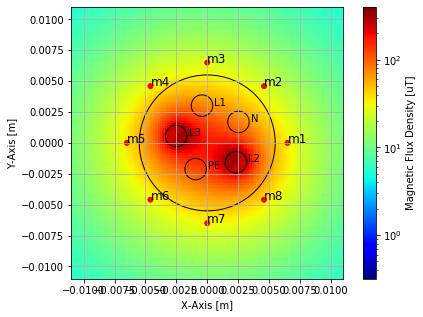

In [11]:
s.plot_Fields(idx=0)

### Get Simulation Results

In [12]:
m = s.get_Measurements()

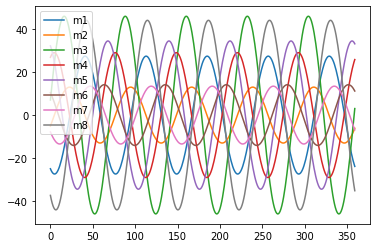

In [13]:
m.plot()